In [95]:
import numpy as jp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [96]:
df=pd.read_csv('Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


# Preprocessing Data

In [98]:
# 1. Missing Data

df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [99]:
# 2. ENcoding

# Only Species needs encoding...will do at the end of EDA>.

In [100]:
# 3. Outliers

df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


All the features have good max value..preety much in range. So we will not do anything here. 

In [101]:
# 4. No imbalance data is required. As it is a regression problem....
# we need to check the imbalance data in classification problem.

In [102]:
# 5. Feature Scaling

# Must to do scaling in Regression problem. 
# WIll do it after the EDA process. 

# Exploratory Data Analysis

In [103]:
df.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

Weight


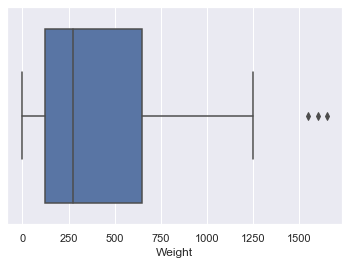

Length1


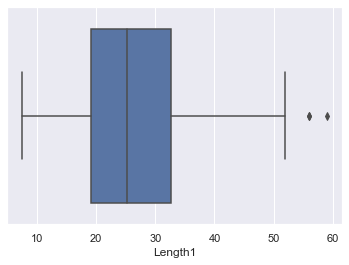

Length2


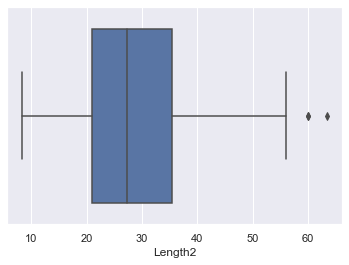

Length3


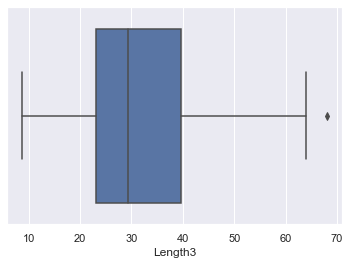

Height


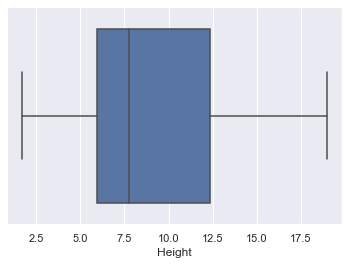

Width


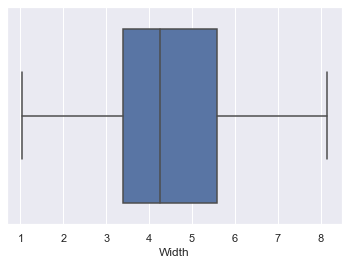

In [104]:
def box(i):
    sns.boxplot(df[i])
    plt.show()
    
for i in df.select_dtypes(exclude='object').columns:
    print(i)
    box(i)

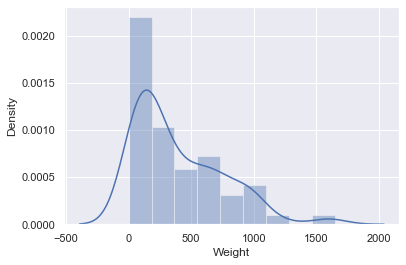

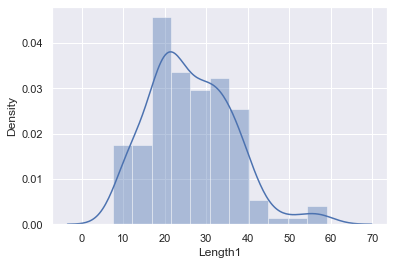

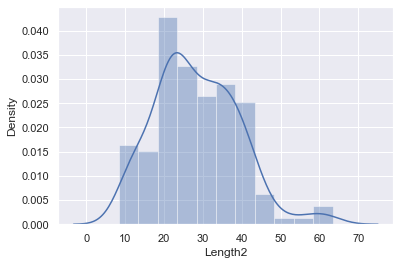

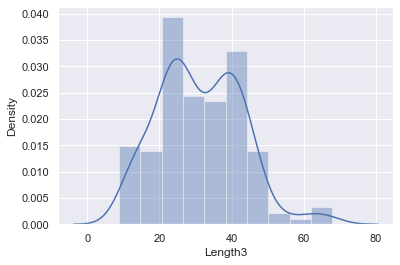

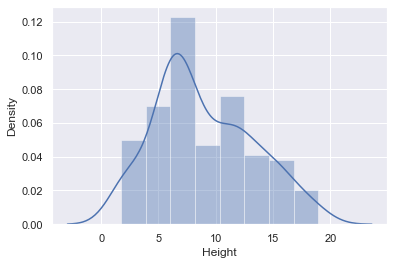

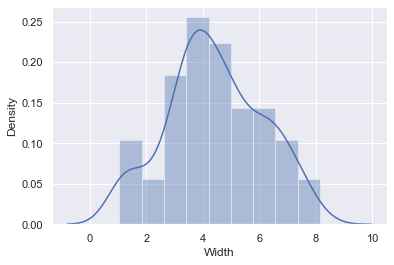

In [105]:
def dist(i):
    sns.distplot(df[i])
    plt.show()
    
for i in df.select_dtypes(exclude='object'):
    dist(i)

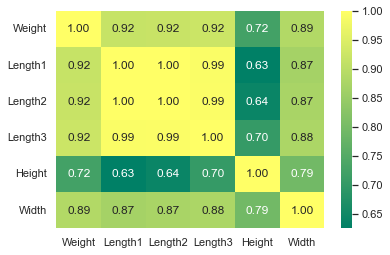

In [107]:
sns.heatmap(df.corr(),annot=True,fmt='0.02f',cmap = 'summer')
plt.show()

In [109]:
df1 = df.drop(['Length2','Length3'],axis=1)
df1.head()

,Species,Weight,Length1,Height,Width
0,Bream,242.0,23.2,11.5200,4.0200
1,Bream,290.0,24.0,12.4800,4.3056
2,Bream,340.0,23.9,12.3778,4.6961
3,Bream,363.0,26.3,12.7300,4.4555
4,Bream,430.0,26.5,12.4440,5.1340


All lenghts are highly coreelated. We can see Length 1 is highly corrlated with length2 and length3.

<AxesSubplot:>

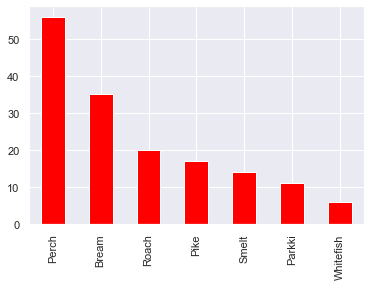

In [110]:
df['Species'].value_counts().plot(kind='bar',color='red')

In [114]:
from pandas_profiling import ProfileReport
report = ProfileReport(df1)
report.to_file("Fish.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

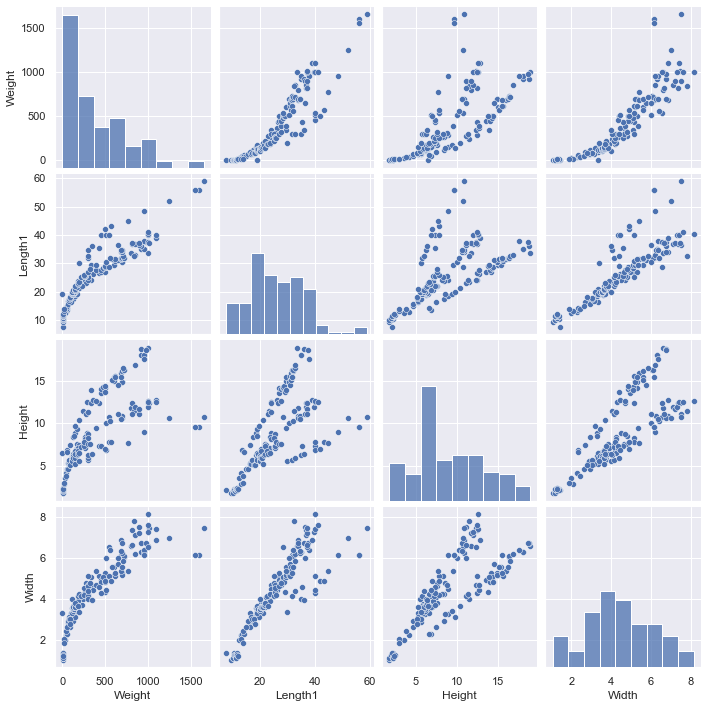

In [115]:
sns.pairplot(df1)
plt.show()

In [116]:
# ENCODING.

df1 = pd.get_dummies(df1,columns=['Species'],drop_first=True)
df1.head()

,Weight,Length1,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,11.5200,4.0200,0,0,0,0,0,0
1,290.0,24.0,12.4800,4.3056,0,0,0,0,0,0
2,340.0,23.9,12.3778,4.6961,0,0,0,0,0,0
3,363.0,26.3,12.7300,4.4555,0,0,0,0,0,0
4,430.0,26.5,12.4440,5.1340,0,0,0,0,0,0


In [117]:
#spliting the data into DV and IDV. 

x = df1.iloc[:,1:]
y = df1.iloc[:,0]

In [118]:
x.head()

,Length1,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,23.2,11.5200,4.0200,0,0,0,0,0,0
1,24.0,12.4800,4.3056,0,0,0,0,0,0
2,23.9,12.3778,4.6961,0,0,0,0,0,0
3,26.3,12.7300,4.4555,0,0,0,0,0,0
4,26.5,12.4440,5.1340,0,0,0,0,0,0


In [119]:
y

0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
       ...  
154     12.2
155     13.4
156     12.2
157     19.7
158     19.9
Name: Weight, Length: 159, dtype: float64

In [120]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc_x = sc.fit_transform(x)
sc_x

array([[-0.30578858,  0.59657867, -0.23652895, ..., -0.37932162,
        -0.31072773, -0.19802951],
       [-0.22550724,  0.82126055, -0.06657895, ..., -0.37932162,
        -0.31072773, -0.19802951],
       [-0.23554241,  0.79734129,  0.16579317, ..., -0.37932162,
        -0.31072773, -0.19802951],
       ...,
       [-1.41969211, -1.56668655, -1.88140219, ..., -0.37932162,
         3.21825152, -0.19802951],
       [-1.30930527, -1.42724336, -1.39856804, ..., -0.37932162,
         3.21825152, -0.19802951],
       [-1.24909427, -1.41334117, -1.51043989, ..., -0.37932162,
         3.21825152, -0.19802951]])

In [121]:
# Spliting training and testing datasets

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)
print(x_train.shape,x_test.shape,y_train.shape,y_train.shape)

(127, 9) (32, 9) (127,) (127,)


# MODEL BUILDING

In [122]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [123]:
lr.coef_

array([  38.09429267,   -1.8669545 ,   26.9143574 ,   43.36602646,
        -32.98790614, -370.99617003,  -46.18743341,  213.22268887,
        -36.78660418])

In [124]:
lr.intercept_

-669.103330792276

In [125]:
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

# Evaluating accuracy

In [127]:
from sklearn.metrics import r2_score

print('training accuracy :: - ')
r2_score(y_train,y_pred_train) #training accuracy

training accuracy :: - 


0.9353459125494559

In [128]:
print('testing accuracy :: - ')
r2_score(y_test,y_pred_test)

testing accuracy :: - 


0.9054530257838089

Both the training and testing accuracy is very good.

# BUILDING OLS MODEL.

In [129]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

ols = smf.OLS(endog=y_train,exog=x_train).fit()
ols

In [130]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Weight   R-squared (uncentered):                   0.961
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              319.3
Date:                Tue, 16 May 2023   Prob (F-statistic):                    1.94e-78
Time:                        15:13:23   Log-Likelihood:                         -774.13
No. Observations:                 127   AIC:                                      1566.
Df Residuals:                     118   BIC:                                      1592.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Length1              45.4446      5.079      8.948      0.000      35.387      55.502
Height              -93.9821      7.989    -11.764      0.000    -109.802     -78.162
Width               123.4345     25.323      4.874      0.000      73.287     173.582
Species_Parkki     -243.8537     37.465     -6.509      0.000    -318.045    -169.663
Species_Perch      -612.7444     42.614    -14.379      0.000    -697.132    -528.357
Species_Pike      -1130.9634    105.524    -10.718      0.000   -1339.929    -921.998
Species_Roach      -602.9189     39.942    -15.095      0.000    -682.015    -523.823
Species_Smelt      -465.8085     41.888    -11.120      0.000    -548.758    -382.859
Species_Whitefish  -525.6813     60.399     -8.703      0.000    -645.288    -406.074
==============================================================================
Omnibus:                        8.230   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.016   Jarque-Bera (JB):               11.038
Skew:                           0.346   Prob(JB):                      0.00401
Kurtosis:                       4.268   Cond. No.                         365.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# OBSERVATIONS


1. Linearity CHeck::In the pair plot we see that the IDV - weight is linearly related to all the other DVs; 

2. Homoscadasticity : THe error should have euqal valriance. Meaning....distance between actual points and the predicted one, should be eually distributed. If not outlier treatment is required. 

3. Normality Test : Q-Q plot is made between predicted values and actual values of the test. More or less, it goes in a perfect line.So, normality is also checked. 

4. Durbin Watson Test = if it is 2 or nealry two , we can say that there is no problem of autocorrelation. -- we have got a value of 1.9...so it is good score. 

5. Multicolinearity - It means that the data should not be correlated a lot...although 3 columns were highly correlated, we didnt do any treatment. Will be doing the below model, rmeoving the colinear columns. 

6. p - value - i good for all except Length

7. adjusted R-Squared value is very good. THe model is good. 

8. Endoginity - DV is chosen correctly.




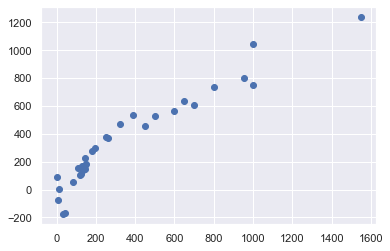

In [132]:
# Q-Q Plots

plt.scatter(y_test,y_pred_test)
plt.show()

<AxesSubplot:ylabel='Density'>

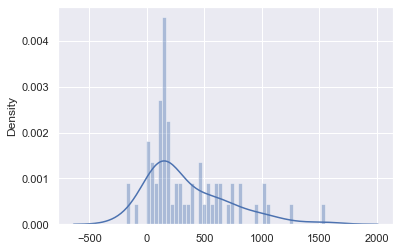

In [134]:
sns.distplot((y_test,y_pred_test),bins=50)

Residual/Loss is also normally distributed.

# Final Obesrvation

Adjusted R-squared value is very good. We can say that the model is going to predict the weight very well. 
We will just check if there is any overfitting issue, otherwise, we can use this mdoel for weight prediction of the fish.

# Regularization - Checking the overfitting issue

1. Ridge
2. Lasso
3. ElasticNet

In [136]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [138]:
# 1. Ridge

ridge=Ridge(alpha=0.01)
ridge.fit(x_train,y_train)
y_pred_ridge = ridge.predict(x_test)
r2_score(y_test,y_pred_ridge)

0.905638682919436

In [139]:
# 2. Lasso

lasso = Lasso(alpha=0.01)
lasso.fit(x_train,y_train)
y_pred_lasso = lasso.predict(x_test)
r2_score(y_test,y_pred_lasso)

0.9056543866970339

In [140]:
# 3. ElasticNet

en = ElasticNet(alpha=0.01)
en.fit(x_train,y_train)
y_pred_en = en.predict(x_test)
r2_score(y_test,y_pred_en)

0.9075318497334761

We can see that all these scores are amazing and we can say that the model doesn't show any overfitting issue as well. 

Linear Regression Model is good to go for fish weight detection. 